### 1) Impoerter les packages nécessaires

In [ ]:
#packages deep learning
from __future__ import print_function
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

#Packages initiales
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle
import pandas as pd


### 2) Télécharger la base de données

In [3]:
mask = 'H:/facial_mask_classifier/data/with_mask'
no_mask = 'H:/facial_mask_classifier/data/without_mask'


images = []
for file in list(os.listdir(mask)):
    images.append(cv2.imread(mask+'/'+file))
    
for file in list(os.listdir(no_mask)):
    images.append(cv2.imread(no_mask+'/'+file)) 
    
images = np.array([cv2.resize(img,(160,160),interpolation=cv2.INTER_AREA) for img in images])    
print('x shape',images.shape)


x shape (1376, 160, 160, 3)


In [4]:
n_mask, n_no_mask = len(list(os.listdir(mask))),   len(list(os.listdir(no_mask)))
labels = np.zeros(( n_mask  + n_no_mask, 2  ))
labels[:n_mask,0],  labels[n_mask:,1] = 1,  1

### 3) Préparation la base de données

In [7]:
data_size = labels.shape[0]
index = list(range(data_size))
shuffle(index)
index = np.array(index)

images, labels =   images[index], labels[index,:]

x_train , x_test =  images[:int(0.8*data_size)],   images[int(0.8*data_size):]
y_train , y_test =  labels[:int(0.8*data_size),:] , labels[int(0.8*data_size):,:]


### 4) Création model

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(160,160,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 158, 158, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 79, 79, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 77, 77, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 36, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 18, 18, 64)        0

### 5) entrainer le model et sauvgarder the best

In [11]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("face_mask.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[checkpoint_cb, early_stopping_cb])

Train on 1100 samples, validate on 276 samples
Epoch 1/100
1100/1100 [==============================] - 28s 25ms/sample - loss: 9.9871 - accuracy: 0.7236 - val_loss: 0.1141 - val_accuracy: 0.9710
Epoch 2/100
1100/1100 [==============================] - 26s 24ms/sample - loss: 0.1230 - accuracy: 0.9600 - val_loss: 0.1286 - val_accuracy: 0.9457
Epoch 3/100
1100/1100 [==============================] - 25s 23ms/sample - loss: 0.0785 - accuracy: 0.9755 - val_loss: 0.0469 - val_accuracy: 0.9891
Epoch 4/100
1100/1100 [==============================] - 25s 23ms/sample - loss: 0.0461 - accuracy: 0.9827 - val_loss: 0.0597 - val_accuracy: 0.9891
Epoch 5/100
1100/1100 [==============================] - 25s 23ms/sample - loss: 0.0394 - accuracy: 0.9836 - val_loss: 0.0591 - val_accuracy: 0.9783
Epoch 6/100
1100/1100 [==============================] - 25s 23ms/sample - loss: 0.0280 - accuracy: 0.9882 - val_loss: 0.0380 - val_accuracy: 0.9891
Epoch 7/100
1100/1100 [==============================] - 26

### 6) Test le pérformence de model

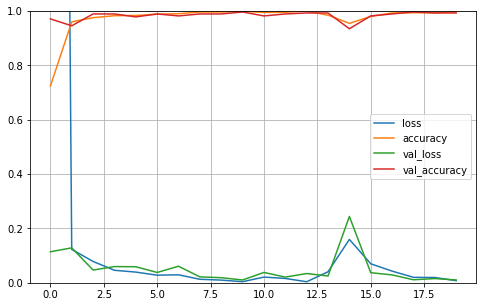

In [22]:
pd.DataFrame(model.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
del model
cap.release()

### 7) télécharger le model et l'utiliser

In [ ]:
model = keras.models.load_model('face_mask.h5')